In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers  import LSTM
from tensorflow.keras.layers import Dropout

In [3]:
from google.colab import files


uploaded = files.upload()


Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [4]:
from google.colab import files


uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [6]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
training_set =dataset_train.iloc[:,1:2].values

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))

In [21]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 12s 97ms/step - loss: 0.0221
Epoch 2/100
46/46 [==============================] - 5s 117ms/step - loss: 0.0036
Epoch 3/100
46/46 [==============================] - 4s 96ms/step - loss: 0.0032
Epoch 4/100
46/46 [==============================] - 4s 96ms/step - loss: 0.0037
Epoch 5/100
46/46 [==============================] - 6s 124ms/step - loss: 0.0029
Epoch 6/100
46/46 [==============================] - 5s 102ms/step - loss: 0.0033
Epoch 7/100
46/46 [==============================] - 6s 121ms/step - loss: 0.0028
Epoch 8/100
46/46 [==============================] - 4s 96ms/step - loss: 0.0025
Epoch 9/100
46/46 [==============================] - 4s 95ms/step - loss: 0.0030
Epoch 10/100
46/46 [==============================] - 5s 120ms/step - loss: 0.0025
Epoch 11/100
46/46 [==============================] - 4s 96ms/step - loss: 0.0025
Epoch 12/100
46/46 [==============================] - 5s 114ms/step - loss: 0.0028
Epoch 13/100
46/46

In [24]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
dataset_test.head(5)

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [25]:
real_stock_price = dataset_test.iloc[:,1:2].values
real_stock_price.shape

(125, 1)

In [28]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [29]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [30]:
x_test=[]
for i in range(60,len(inputs)):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [31]:
predicted_stock_price = regressor.predict(x_test)


4/4 [==============================] - 2s 29ms/step


In [32]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

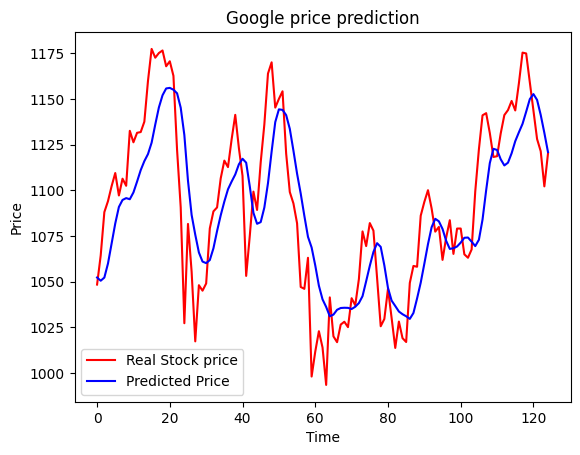

In [33]:
plt.plot(real_stock_price,label='Real Stock price',color='red')
plt.plot(predicted_stock_price,label='Predicted Price',color='blue')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()